In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
import re 
import csv
import pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns

In [ ]:
def load_data():
  data = pd.read_csv('drive/MyDrive/SKRIPSI/Data-hasil-stopword.csv',encoding='ISO-8859-1')

  return data

In [ ]:
tweet_df = load_data()
tweet_df.head(1000)

,Tweets
0,"['vaksin', 'berasa', 'digigit', 'semut', 'seka..."
1,"['disadari', 'warga', 'republik', 'indonesia',..."
2,"['puluhan', 'asn', 'terjaring', 'razia', 'vaks..."
3,"['iya', 'deh', 'bangga', 'pure', 'bloood', 'va..."
4,"['iya', 'deh', 'insyaallah', 'program', 'vaksi..."
...,...
673,"['jae', 'habis', 'vaksin', 'tangan', 'sakit', ..."
674,"['vaksin', 'keluarga', 'sehat', 'maju', 'jokow..."
675,['vaksin']
676,"['disuntik', 'vaksin', 'biar', 'kuat', 'fisikn..."


In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  678 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB


In [ ]:
df = pd.DataFrame(tweet_df[['Tweets']])

In [ ]:
data5 = pd.read_csv('drive/MyDrive/SKRIPSI/Data-hasil-stopword.csv',encoding='ISO-8859-1')
data5

,Tweets
0,"['vaksin', 'berasa', 'digigit', 'semut', 'seka..."
1,"['disadari', 'warga', 'republik', 'indonesia',..."
2,"['puluhan', 'asn', 'terjaring', 'razia', 'vaks..."
3,"['iya', 'deh', 'bangga', 'pure', 'bloood', 'va..."
4,"['iya', 'deh', 'insyaallah', 'program', 'vaksi..."
...,...
673,"['jae', 'habis', 'vaksin', 'tangan', 'sakit', ..."
674,"['vaksin', 'keluarga', 'sehat', 'maju', 'jokow..."
675,['vaksin']
676,"['disuntik', 'vaksin', 'biar', 'kuat', 'fisikn..."


In [ ]:
#Stemming Indonesian
def stemmingIndo(Tweets):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(Tweets)

df['Tweets'] = df['Tweets'].apply(lambda x: stemmingIndo(x.lower()))
df.head(700)

,Tweets
0,vaksin asa gigit semut kampung vaksin asa gigi...
1,sadar warga republik indonesia hidup damping c...
2,puluh asn jaring razia vaksin kota subulussala...
3,iya deh bangga pure bloood vaksin mah noda pen...
4,iya deh insyaallah program vaksin kantor desa
...,...
673,jae habis vaksin tangan sakit gel
674,vaksin keluarga sehat maju jokowi
675,vaksin
676,suntik vaksin biar kuat fisik lemah hati


In [ ]:
#Simpan data hasil tokenization ke dalam drive
df['Tweets'].to_csv("drive/MyDrive/SKRIPSI/Data-hasil-stemming.csv",encoding='utf-8',index=False)

In [ ]:
data6 = pd.read_csv('drive/MyDrive/SKRIPSI/Data-hasil-stemminglabel.csv',encoding='ISO-8859-1')
data6

,Tweets,Label
0,vaksin asa gigit semut kampung vaksin asa gigi...,Negatif
1,sadar warga republik indonesia hidup damping c...,Positif
2,puluh asn jaring razia vaksin kota subulussala...,Negatif
3,iya deh bangga pure bloood vaksin mah noda pen...,Negatif
4,iya deh insyaallah program vaksin kantor desa,Positif
...,...,...
673,jae habis vaksin tangan sakit gel,Negatif
674,vaksin keluarga sehat maju jokowi,Positif
675,vaksin,Netral
676,suntik vaksin biar kuat fisik lemah hati,Negatif


In [ ]:
data6 = data6.astype({'Label' : 'category'})
data6 = data6.astype({'Tweets' : 'string'})
data6.dtypes

Tweets      string
Label     category
dtype: object

In [ ]:
data6["Label"].value_counts()

Negatif    312
Positif    216
Netral     150
Name: Label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


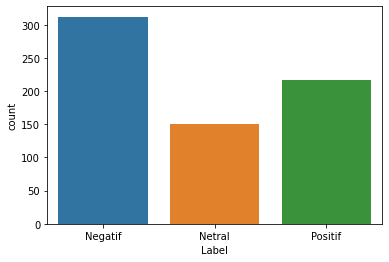

In [ ]:
sns.countplot(data6["Label"])

(-0.5, 399.5, 199.5, -0.5)

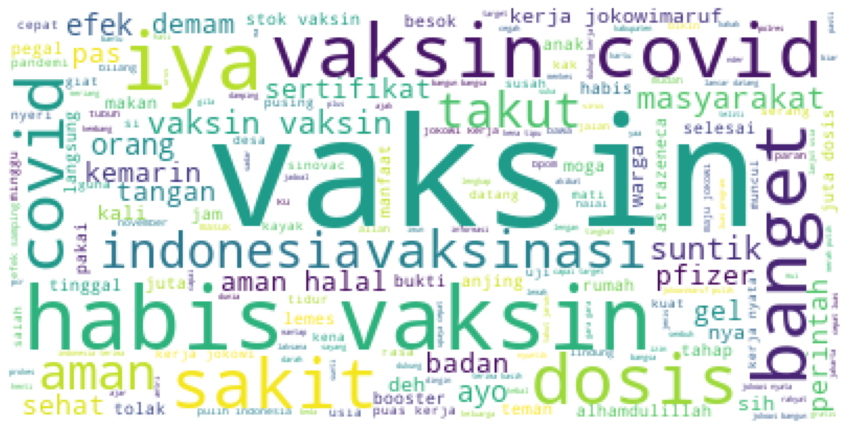

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 10
str_tweets = ' '.join(data6['Tweets'].values)
wordcloud = WordCloud(background_color='white', max_words=1000).generate(str_tweets)
plt.imshow(wordcloud)
plt.axis('off')